In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import files

# Upload the Kaggle API key
uploaded = files.upload()

# Move the uploaded key to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d alifrahman/modiified

 70% 5.00M/7.16M [00:00<00:00, 48.7MB/s]
100% 7.16M/7.16M [00:00<00:00, 52.3MB/s]


In [6]:
!unzip -q /content/modiified.zip -d /content/drive/MyDrive/


In [ ]:
# ! kaggle datasets download -d andrewmvd/liver-tumor-segmentation-part-2

100% 10.8G/10.8G [08:05<00:00, 24.8MB/s]
100% 10.8G/10.8G [08:05<00:00, 23.9MB/s]


In [ ]:
# !unzip -q /content/liver-tumor-segmentation-part-2.zip -d /content/drive/MyDrive/Liver


In [1]:
import os
import numpy as np
from skimage.transform import resize
from skimage import exposure
import nibabel as nib
import pandas as pd

In [2]:
import os

# Specify the paths to the directories where the datasets are extracted
dataset_path_1 = '/content/drive/MyDrive/Liver/Benign'
dataset_path_2 = '/content/drive/MyDrive/Liver/Malignant'

# Function to print information about a dataset
def print_dataset_info(dataset_path):
    file_list = os.listdir(dataset_path)

    print(f"\nDataset at {dataset_path}:")
    print(f"Number of files: {len(file_list)}")
    print(f"First few files: {file_list[:5]}")

    for file_name in file_list:
        file_path = os.path.join(dataset_path, file_name)
        file_size = os.path.getsize(file_path)
        print(f"File: {file_name}, Size: {file_size} bytes")

# Print information for both datasets
print_dataset_info(dataset_path_1)
print_dataset_info(dataset_path_2)



Dataset at /content/drive/MyDrive/Liver/Benign:
Number of files: 50
First few files: ['volume-100.nii', 'volume-51.nii', 'volume-52.nii', 'volume-53.nii', 'volume-54.nii']
File: volume-100.nii, Size: 359137632 bytes
File: volume-51.nii, Size: 119014032 bytes
File: volume-52.nii, Size: 124256944 bytes
File: volume-53.nii, Size: 55050592 bytes
File: volume-54.nii, Size: 100663648 bytes
File: volume-55.nii, Size: 201326944 bytes
File: volume-56.nii, Size: 125305184 bytes
File: volume-57.nii, Size: 383779168 bytes
File: volume-58.nii, Size: 111149408 bytes
File: volume-59.nii, Size: 113246560 bytes
File: volume-60.nii, Size: 127926624 bytes
File: volume-61.nii, Size: 101187936 bytes
File: volume-62.nii, Size: 98566496 bytes
File: volume-63.nii, Size: 109052256 bytes
File: volume-64.nii, Size: 120586592 bytes
File: volume-65.nii, Size: 268960096 bytes
File: volume-66.nii, Size: 45089120 bytes
File: volume-67.nii, Size: 86507872 bytes
File: volume-68.nii, Size: 278921568 bytes
File: volume-

In [ ]:
import nibabel as nib

file_path = '/content/drive/MyDrive/Liver/Benign/volume-100.nii'
img = nib.load(file_path)
data = img.get_fdata()

In [ ]:
data

memmap([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [ -993.,  -988.,  -980., ...,  -971.,  -980.,  -971.],
         [ -995.,  -983.,  -966., ..., -1008., -1020.,  -997.],
         [ -999.,  -981.,  -975., ...,  -997., -1011., -1009.]],

        [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [ -988.,  -986.,  -981., ...,  -999.,  -986.,  -983.],
         [ -992.,  -986.,  -984., ..., -1020., -1016.,  -998.],
         [-1003.,  -992.,  -992., ...,  -985.,  -991.,  -995.]],

        [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        

In [ ]:
shape=data.shape
voxel_sizes = img.header.get_zooms()


In [ ]:
# Print metadata
print("Shape:", shape)
print("Voxel Sizes:", voxel_sizes)

Shape: (512, 512, 685)
Voxel Sizes: (0.69921875, 0.69921875, 0.6999999)


In [ ]:
slice_index

342

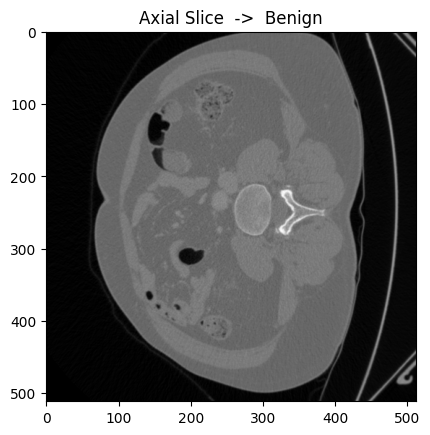

In [ ]:
import matplotlib.pyplot as plt

# Display a slice along the third axis (e.g., axial slice)
slice_index = shape[2] // 2
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.title('Axial Slice  ->  Benign')
plt.show()

In [ ]:


file_path = '/content/drive/MyDrive/Liver/Benign/volume-100.nii'
img = nib.load(file_path)
data = img.get_fdata()

In [ ]:
file_path = '/content/drive/MyDrive/Liver/Malignant/volume-101.nii'
img = nib.load(file_path)
maligant = img.get_fdata()

In [ ]:
shape=maligant.shape
voxel_sizes = img.header.get_zooms()

In [ ]:
print("maligant Shape:", shape)
print("Voxel Sizes:", voxel_sizes)

maligant Shape: (512, 512, 683)
Voxel Sizes: (0.7050781, 0.7050781, 0.7)


In [ ]:
maligant.shape

(512, 512, 683)

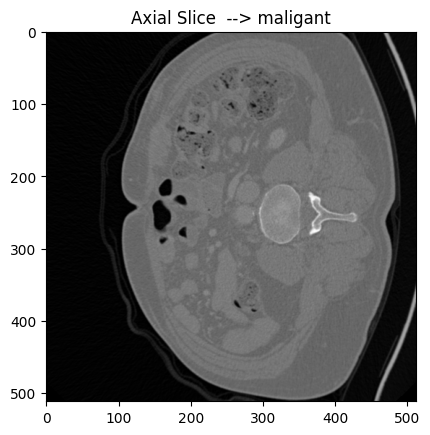

In [ ]:
slice_index = shape[2] // 2
plt.imshow(maligant[:, :, slice_index], cmap='gray')
plt.title('Axial Slice  --> maligant')
plt.show()

In [3]:
  # Create a meta file for nii files processing

  file_list = []
  for dirname, _, filenames in os.walk('/content/drive/MyDrive/Liver/Benign'):
      for filename in filenames:
          file_list.append((dirname, filename))

  for dirname, _, filenames in os.walk('/content/drive/MyDrive/Liver/Malignant'):
      for filename in filenames:
          file_list.append((dirname, filename))

  df_files = pd.DataFrame(file_list, columns =['dirname', 'filename'])
  df_files.sort_values(by=['filename'], ascending=True)


df_files['label'] = 0  # Assign default label for benign
df_files.loc[df_files['dirname'].str.contains('Malignant'), 'label'] = 1

In [1]:
df_files

NameError: ignored

In [5]:

# Function to load NIfTI data
def load_nifti_data(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data




In [6]:
# from skimage.transform import resize
# from skimage import exposure

# def preprocess_data(folder_paths, target_size):
#     data = []

#     for folder_path in folder_paths:
#         for filename in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, filename)

#             # Check if the file is a NIfTI file
#             if file_path.endswith(".nii"):
#                 img_data = load_nifti_data(file_path)
#                 # Resize the image data to the target size
#                 resized_data = resize_data(img_data, target_size)
#                 data.append(resized_data)

#     return data


In [7]:
target_size = (128, 128, 64)


benign_data_paths = df_files[df_files['label'] == 0]['dirname'].values
malignant_data_paths = df_files[df_files['label'] == 1]['dirname'].values


In [11]:
from scipy.ndimage import zoom

def preprocess_data(folder_paths, target_size):
    data = []
    for folder_path in folder_paths:
        files_df = df_files[df_files['dirname'] == folder_path]
        for _, row in files_df.iterrows():
            filename = row['filename']
            file_path = os.path.join(folder_path, filename)

            # Check if the file is a NIfTI file
            if filename.endswith(".nii"):
                img_data = load_nifti_data(file_path)

                # Resize the image data to the target size using scipy's zoom function
                resized_data = zoom(img_data, target_size / np.array(img_data.shape), order=1)

                data.append(resized_data)

    return data


In [ ]:
# Define the target size for resizing
target_size = (128, 128, 64)  # Replace these values with your desired dimensions

# Preprocess benign data
benign_data_paths = df_files[df_files['label'] == 0]['dirname'].values
benign_data = preprocess_data(benign_data_paths, target_size)

# Preprocess malignant data
malignant_data_paths = df_files[df_files['label'] == 1]['dirname'].values
malignant_data = preprocess_data(malignant_data_paths, target_size)


Data Preprocessing

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/drive/MyDrive/Modified_Dataset/Train'
test_dir = '/content/drive/MyDrive/Modified_Dataset/Test'

# Image Data Generator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Image Data Generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # for multi-class classification
    shuffle=True
)

# Create test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1050 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


Model Building

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras import Model

# Load the pre-trained ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Fine-tune the last few layers of the pre-trained model
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Create your own model on top of ResNet50
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(3, activation='softmax')(x)  # 3 classes: benign, malignant, normal

model = Model(base_model.input, output)

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with increased epochs
history = model.fit(
    train_generator,
    epochs=20,  # You can try increasing the number of epochs
    validation_data=test_generator
)


94765736/94765736 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

Model Testing

In [5]:
# Evaluate the model on the test set
train_loss, train_accuracy = model.evaluate(train_generator)
# print("Train Loss:",train_loss )
print("train accuracy:", train_accuracy)


33/33 [==============================] - 16s 497ms/step - loss: 0.2830 - accuracy: 0.8952
train accuracy: 0.8952381014823914


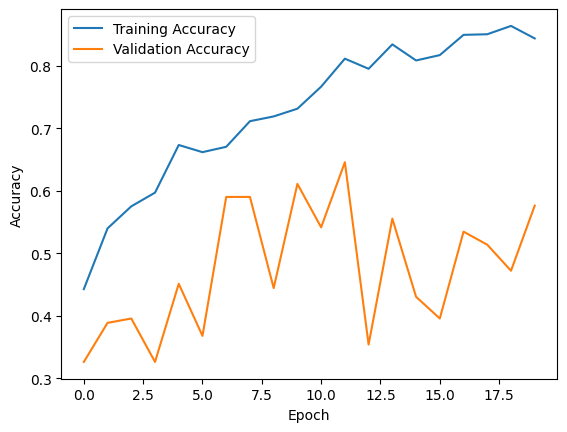

In [6]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model.save('/content/drive/MyDrive/Modified_Dataset/liver_tumor_resnet50.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

def predict_tumor_class(model, image_path):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class label
    predicted_class = np.argmax(predictions, axis=1)

    # Map the class index to the actual class name
    class_mapping = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}
    predicted_class_name = class_mapping[predicted_class[0]]

    return predicted_class_name, predictions[0]

# Example usage:
image_path_to_predict = '/content/drive/MyDrive/Modified_Dataset/Train/MALIGNANT/1.jpg'
predicted_class, predictions = predict_tumor_class(model, image_path_to_predict)

# Display the results
print(f"Predicted Class: {predicted_class}")
print("Class Probabilities:", predictions)


1/1 [==============================] - 0s 23ms/step
Predicted Class: Malignant
Class Probabilities: [0.00259765 0.98818445 0.00921786]


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

def predict_tumor_class(model, image_path):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class label
    predicted_class = np.argmax(predictions, axis=1)

    # Map the class index to the actual class name
    class_mapping = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}
    predicted_class_name = class_mapping[predicted_class[0]]

    return predicted_class_name, predictions[0]

# Example usage:
image_path_to_predict = '/content/drive/MyDrive/Modified_Dataset/Test/MALIGNANT/1.jpg'
predicted_class, predictions = predict_tumor_class(model, image_path_to_predict)

# Display the results
print(f"Predicted Class: {predicted_class}")
print("Class Probabilities:", predictions)


1/1 [==============================] - 0s 24ms/step
Predicted Class: Malignant
Class Probabilities: [0.23276174 0.43075523 0.33648303]
